# House Prices - Advanced Regression Techniques

- Utilizaando os [dados disponíveis no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - Dataset de competição
    - A avaliação será através do erro quadrático médio

## Modelos 3 - Utilizando os modelos iniciais
- O objetivo é aplicar os mesmos algorítimos anteriores e comparar os resultados.

- Tópicos:
    - [Arquivo 3_1](#Arquivo3_1)
    - [Arquivo 3_2](#Arquivo3_2)
    - [Algoritmos](#Algoritmos)

<a id='Arquivo3_1'></a>
### Arquivo 3_1

In [29]:
# Importando o pandas
import pandas as pd

In [41]:
# Importando as bases
treino = pd.read_csv('train3_1.csv')
teste = pd.read_csv('test3_1.csv')

In [42]:
# Verificando o formato da base
treino.shape

(1460, 85)

In [43]:
# Verificando o formato da base
teste.shape

(1459, 84)

In [44]:
# Verificando o tipo de dados nas colunas
treino.dtypes.value_counts()

int64      37
object     35
float64    13
Name: count, dtype: int64

In [45]:
# Verificando o tipo de dados nas colunas
teste.dtypes.value_counts()

object     35
int64      29
float64    20
Name: count, dtype: int64

In [46]:
# Selecionando apenas as colunas numéricas
cols_nr = treino.columns[treino.dtypes != 'object']
cols_nr[cols_nr != 'SalePrice']

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'GarageType_-1', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageType_infrequent_sklearn'],
      dtype='object')

In [47]:
# Criando uma nova base com esses valores
treino = treino.loc[:,cols_nr]
treino.shape

(1460, 50)

In [48]:
# Mantendo também apenas as colunas numéricas para a base de teste
teste = teste.loc[:,cols_nr[cols_nr != 'SalePrice']]
teste.shape

(1459, 49)

<a id='Arquivo3_2'></a>
### Arquivo 3_2

In [100]:
# Importando as bases
treino = pd.read_csv('train3_2.csv')
teste = pd.read_csv('test3_2.csv')

In [101]:
# Verificando o formato da base
treino.shape

(1460, 146)

In [102]:
# Verificando o formato da base
teste.shape

(1459, 145)

In [103]:
# Verificando o tipo de dados nas colunas
treino.dtypes.value_counts()

int64      133
float64     13
Name: count, dtype: int64

In [104]:
# Verificando o tipo de dados nas colunas
teste.dtypes.value_counts()

int64      125
float64     20
Name: count, dtype: int64

<a id='Algoritmos'></a>
## Algoritmos
- Separando em treino e teste: 
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Algoritmos Utilizados
    - **Regressão Linear**:
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - **Árvore de Regressão**:
        - https://scikit-learn.org/stable/modules/tree.html#regression
    - **KNeighborsRegressor**:
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

In [105]:
# Selecionando X e y
X = treino.drop('SalePrice',axis=1)
y = treino.SalePrice

In [106]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [107]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Regressão Linear

In [108]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [109]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [110]:
# Fazendo a previsão pros dados de teste
y_pred_rl = reg_rl.predict(X_test)

#### Árvore de Regressão

In [111]:
# Importando a árvore de regressão
from sklearn import tree

In [112]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_ad = tree.DecisionTreeRegressor().fit(X_train, y_train)

In [113]:
# Fazendo a previsão
y_pred_ad = reg_ad.predict(X_test)

#### KNeighborsRegressor

In [114]:
# Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [115]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [116]:
# Fazendo a previsão
y_pred_knn = reg_knn.predict(X_test)

## Avaliando os resultados
- Erro médio absoluto:
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
- Erro quadrático médio:
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [117]:
# Importando o erro médio absoluto e o erro quadrático médio
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [118]:
# Erro regressão linear
print(f'Erro absoluto: {mean_absolute_error(y_test, y_pred_rl)}')
print(f'Erro quadrático: {mean_squared_error(y_test, y_pred_rl)}')

Erro absoluto: 22157.115236188605
Erro quadrático: 1539851963.9372888


In [119]:
# Erro árvore de decisão
print(f'Erro absoluto: {mean_absolute_error(y_test, y_pred_ad)}')
print(f'Erro quadrático: {mean_squared_error(y_test, y_pred_ad)}')

Erro absoluto: 28240.41701244813
Erro quadrático: 2432913440.76556


In [120]:
# Erro knn
print(f'Erro absoluto: {mean_absolute_error(y_test, y_pred_knn)}')
print(f'Erro quadrático: {mean_squared_error(y_test, y_pred_knn)}')

Erro absoluto: 34685.060165975105
Erro quadrático: 2884773859.4107885


- **Visualizando graficamente**

In [121]:
# Importando o matplotlib
import matplotlib.pyplot as plt

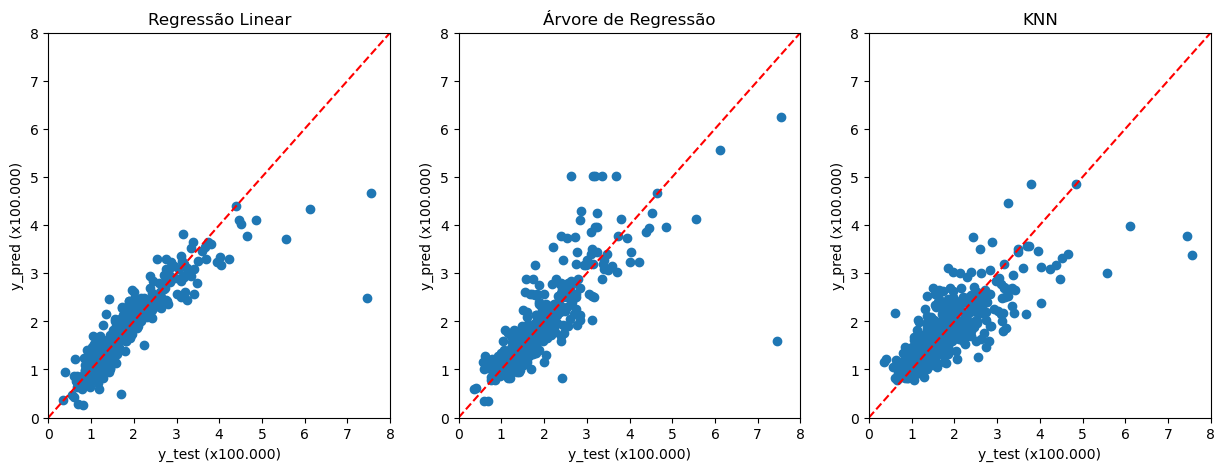

In [122]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rl/100000)
ax[0].plot([0,8],[0,8],'--r')
ax[0].set(xlim=(0, 8),ylim=(0, 8))
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Regressão Linear')

ax[1].scatter(y_test/100000, y_pred_ad/100000)
ax[1].plot([0,8],[0,8],'--r')
ax[1].set(xlim=(0, 8),ylim=(0, 8))
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('Árvore de Regressão')

ax[2].scatter(y_test/100000, y_pred_knn/100000)
ax[2].plot([0,8],[0,8],'--r')
ax[2].set(xlim=(0, 8),ylim=(0, 8))
ax[2].set_xlabel('y_test (x100.000)')
ax[2].set_ylabel('y_pred (x100.000)')
ax[2].set_title('KNN')

plt.show()

## Construindo Previsão
- Utilizando a **regressão linear**

In [123]:
# Fazer a previsão
y_pred = reg_rl.predict(teste)

In [124]:
# Adicionando a coluna na base
teste['SalePrice'] = y_pred

In [125]:
# Extraindo as colunas Id e SalePrice
resultado = teste[['Id','SalePrice']]

In [126]:
# Exportando para um csv
# resultado.to_csv('resultado3_1.csv', index=False)

resultado.to_csv('resultado3_2.csv', index=False)

- **Resultado**
<img src="pkgImagens/resultado3.png" width=900>